# Preprocessing categorical data

The goal of this notebook is to learn how to transform our categorical data into a sklearn pipeline.

The following articles on the platform can be useful: 

* [One Hot Encoding](https://platform.wbscodingschool.com/courses/data-science/12675/)
* [Ordinal Encoding](https://platform.wbscodingschool.com/courses/data-science/14425/)

## Create train and test



How can you split the data into train and test sets?

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# reading
data = pd.read_csv('https://raw.githubusercontent.com/JoanClaverol/housing_data/main/housing-classification-iter5.csv')


In [2]:
data['Expensive'].value_counts()

0    1243
1     217
Name: Expensive, dtype: int64

In [3]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive',
       'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [4]:
# X and y creation
X = data
y = X.pop("Expensive")

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

#DecisionTree

In [5]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2) 
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
 

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.931484538351491}

In [6]:
accuracy_score(search.predict(X_test), y_test)

0.9315068493150684

# KNN

In [7]:
# solution
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsClassifier()
                                 )


param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "kneighborsclassifier__n_neighbors": range(2, 20),
    "kneighborsclassifier__weights": ["uniform", "distance"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

knn_search.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


0.9220938336818165

In [8]:
accuracy_score(search.predict(X_test), y_test)

0.9315068493150684

#RandomForest

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_full_pipeline = make_pipeline(preprocessor,
                                  RandomForestClassifier()
                                 )
param_grid = [{
    'randomforestclassifier__max_depth':[2, 3, 4],
    'randomforestclassifier__max_features':[2, 3, 4, 5, 6]
}]

rf_search = GridSearchCV(rf_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

rf_search.fit(X_train, y_train)

rf_search.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


0.930640842228825

In [10]:
accuracy_score(search.predict(X_test), y_test)

0.9315068493150684

#SVM -WARNING VERY SLOW

In [11]:
'''
from sklearn.svm import SVC

svm_full_pipeline = make_pipeline(preprocessor,
                                  SVC()
                                 )


#
# Create the parameter grid
#
param_grid_svc = {
                    'svc__C': [0.001, 0.01, 0.05],
                    'svc__kernel': ['linear', 'rbf'],
                    'svc__gamma': [0.001, 0.01]
                 }
#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=svm_full_pipeline,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=5,
                     refit=True)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, y_train)
#
# Print the training score of the best model
#
print(gsSVC.best_score_)
#
# Print the model parameters of the best model
#
print(gsSVC.best_params_)
#
'''

"\nfrom sklearn.svm import SVC\n\nsvm_full_pipeline = make_pipeline(preprocessor,\n                                  SVC()\n                                 )\n\n\n#\n# Create the parameter grid\n#\nparam_grid_svc = {\n                    'svc__C': [0.001, 0.01, 0.05],\n                    'svc__kernel': ['linear', 'rbf'],\n                    'svc__gamma': [0.001, 0.01]\n                 }\n#\n# Create an instance of GridSearch Cross-validation estimator\n#\ngsSVC = GridSearchCV(estimator=svm_full_pipeline,\n                     param_grid = param_grid_svc,\n                     scoring='accuracy',\n                     cv=5,\n                     refit=True)\n#\n# Train the SVM classifier\n#\ngsSVC.fit(X_train, y_train)\n#\n# Print the training score of the best model\n#\nprint(gsSVC.best_score_)\n#\n# Print the model parameters of the best model\n#\nprint(gsSVC.best_params_)\n#\n"

In [12]:
#svm_search.best_params_

#Classification Performance Metrics

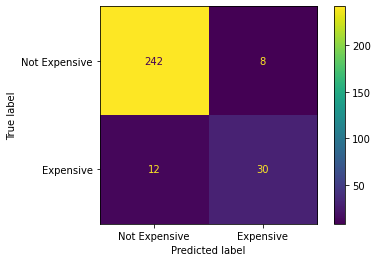

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);

In [14]:
accuracy_score(search.predict(X_test), y_test)

0.9315068493150684

In [15]:
recall_score(search.predict(X_test), y_test)#, f1_score, cohen_kappa_score

0.7894736842105263

In [16]:
precision_score(search.predict(X_test), y_test)

0.7142857142857143

In [17]:
f1_score(search.predict(X_test), y_test)

0.7500000000000001

In [18]:
cohen_kappa_score(search.predict(X_test), y_test)

0.7104323681078937

In [19]:
search.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

# External test set

In [20]:
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path)

In [21]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtFinT

In [22]:
test_data = data
Ids = test_data.pop('Id')

In [23]:
rf_search.predict(test_data)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
submission_file = pd.DataFrame({'Id': Ids, 'Expensive': pd.Series(search.predict(test_data))})
submission_file

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,1
1457,2918,0


In [ ]:
#submission_file.head(50)

In [25]:
from google.colab import files
submission_file.to_csv('test_sample_5.csv', index=False) 
files.download('test_sample_5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>